In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score

c:\users\mridul\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = data['target']

In [8]:
type(X) , type(y)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [11]:
X.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [15]:
X.isnull().sum()   #to check for the missing values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [16]:
#no missing values and no categorical things

In [17]:
#removing outliers 
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)

train_dum = X.copy()
#test_dum = X.copy()

a = ((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR)))

for i,j in zip(np.arange(len(X.median())),X.median()):
    (train_dum.ix[a.iloc[:,i],i]) = j


c:\users\mridul\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


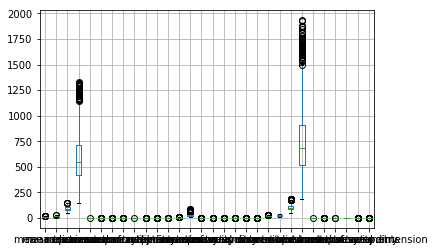

In [18]:
train_dum.boxplot()

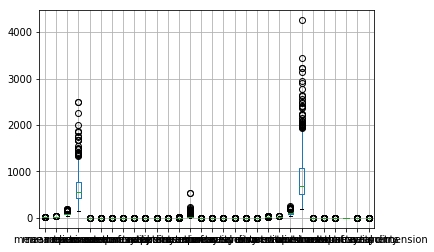

In [19]:
X.boxplot()

In [20]:
X_train,X_test,y_train,y_test = train_test_split(train_dum,y,test_size=0.2,stratify=y,random_state=42)

In [21]:
column_names = X_train.columns
#scaling the terms
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
scale_y = StandardScaler()
X_train = scale_x.fit_transform(X_train)
X_test = scale_x.transform(X_test)


X_train = pd.DataFrame(X_train,columns=column_names)
X_test = pd.DataFrame(X_test,columns=column_names)

In [22]:
model1 = SGDClassifier(max_iter=5, tol=None)
model1.fit(X_train, y_train)
acc_1 = round(model1.score(X_train, y_train) * 100, 2)


model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train, y_train)
acc_2 = round(model2.score(X_train, y_train) * 100, 2)


model3 = LogisticRegression()
model3.fit(X_train, y_train)
acc_3 = round(model3.score(X_train, y_train) * 100, 2)


model4 = KNeighborsClassifier(n_neighbors = 3)
model4.fit(X_train, y_train) 
acc_4 = round(model4.score(X_train, y_train) * 100, 2)


model5 = GaussianNB() 
model5.fit(X_train, y_train)
acc_5 = round(model5.score(X_train, y_train) * 100, 2)


model6 = Perceptron(max_iter=5)
model6.fit(X_train, y_train)
acc_6 = round(model6.score(X_train, y_train) * 100, 2)


model7 = SVC(kernel='rbf',random_state=42)
model7.fit(X_train,y_train)
acc_7 = round(model7.score(X_train,y_train)*100,2)


model8 = SVC(kernel='sigmoid',random_state=42)
model8.fit(X_train,y_train)
acc_8 = round(model8.score(X_train,y_train)*100,2)


model9 = SVC(kernel='poly',degree=2,random_state=42)
model9.fit(X_train,y_train)
acc_9 =round(model9.score(X_train,y_train)*100,2)


model10 = SVC(kernel='poly',degree=3,random_state=42)
model10.fit(X_train,y_train)
acc_10 =round(model10.score(X_train,y_train)*100,2)


model11 = SVC(kernel='poly',degree=4,random_state=42)
model11.fit(X_train,y_train)
acc_11 =round(model11.score(X_train,y_train)*100,2)


model12 = DecisionTreeClassifier()
model12.fit(X_train, y_train) 
acc_12 = round(model12.score(X_train, y_train) * 100, 2)

results = pd.Series( [acc_1, acc_2,acc_3, acc_4,acc_5,acc_6,acc_7,acc_8,acc_9,acc_10,acc_11,acc_12],
                    index =  ['Stochastic Gradient Decent','Random Forest','Logistic Regression','KNC', 
                     'Naive Bayes', 'Perceptron','svcrbf','svcsigmoid','svcpoly2','svcpoly3','svcpoly4',
                              'Decision Tree'])
results = results.sort_values(ascending=False)
results

Decision Tree                 100.00
Random Forest                 100.00
svcrbf                         98.68
KNC                            97.36
Logistic Regression            97.36
svcsigmoid                     97.14
Stochastic Gradient Decent     97.14
Perceptron                     96.26
svcpoly3                       94.95
Naive Bayes                    94.07
svcpoly4                       87.91
svcpoly2                       85.49
dtype: float64

In [24]:
#select the first five classifiers with highest scores decision random svcwithrbf logisticresg knn svcsigmoid 

In [29]:

rf = DecisionTreeClassifier()
scores_1 = cross_val_score(rf,  X_train,y_train, cv=10, scoring = "accuracy")


rf = RandomForestClassifier(n_estimators=100)
scores_2 = cross_val_score(rf, X_train,y_train, cv=10, scoring = "accuracy")



rf = SVC(kernel='rbf',random_state=42)
scores_3 = cross_val_score(rf,  X_train,y_train, cv=10, scoring = "accuracy")


rf = KNeighborsClassifier(n_neighbors = 3)
scores_4 = cross_val_score(rf,  X_train,y_train, cv=10, scoring = "accuracy")


rf = LogisticRegression()
scores_5 = cross_val_score(rf,  X_train,y_train, cv=10, scoring = "accuracy")


rf = SVC(kernel='sigmoid',random_state=42)
scores_6 = cross_val_score(rf,  X_train,y_train, cv=10, scoring = "accuracy")


a = []
b = []

for i in [scores_1,scores_2,scores_3,scores_4,scores_5,scores_6]:
    a.append(i.mean())
    b.append(i.std())

a = np.array(a)
b = np.array(b)

df = pd.DataFrame([a,b,results[:6].values]).T
df.columns = ['mean_of_cross_val','std_of_cross_val','model_without_cross_val']
df.index = results[:6].index

print(df)

                     mean_of_cross_val  std_of_cross_val  \
Decision Tree                 0.923140          0.035578   
Random Forest                 0.953865          0.040954   
svcrbf                        0.962705          0.025862   
KNC                           0.956135          0.025726   
Logistic Regression           0.958213          0.026898   
svcsigmoid                    0.971546          0.019611   

                     model_without_cross_val  
Decision Tree                         100.00  
Random Forest                         100.00  
svcrbf                                 98.68  
KNC                                    97.36  
Logistic Regression                    97.36  
svcsigmoid                             97.14  


In [21]:
#if i were to use full features then i'll use svc with sigmoid kernel

In [22]:
X_train_dummy = X_train.copy()
X_test_dummy = X_test.copy()

In [24]:
#visualizing the results
from sklearn.decomposition import PCA
pca = PCA(n_components=19)
X_train= pca.fit_transform(X_train)
np.round(pca.explained_variance_ratio_,2)

array([0.41, 0.16, 0.09, 0.06, 0.05, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [25]:
X_test = pca.transform(X_test)

In [26]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train) 
acc_knn = round(knn.score(X_train, y_train) * 100, 2)


gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)


perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)


svc_rbf = SVC(kernel='rbf',random_state=42)
svc_rbf.fit(X_train,y_train)
acc_1 = round(svc_rbf.score(X_train,y_train)*100,2)


svc_sigmoid = SVC(kernel='sigmoid',random_state=42)
svc_sigmoid.fit(X_train,y_train)
acc_2 = round(svc_sigmoid.score(X_train,y_train)*100,2)


svc_linear = SVC(kernel='poly',degree=2,random_state=42)
svc_linear.fit(X_train,y_train)
acc_3=round(svc_linear.score(X_train,y_train)*100,2)


svc_linear = SVC(kernel='poly',degree=3,random_state=42)
svc_linear.fit(X_train,y_train)
acc_4=round(svc_linear.score(X_train,y_train)*100,2)


svc_linear = SVC(kernel='poly',degree=4,random_state=42)
svc_linear.fit(X_train,y_train)
acc_5=round(svc_linear.score(X_train,y_train)*100,2)


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

results = pd.Series( [ acc_knn, acc_log,acc_random_forest, acc_gaussian,acc_perceptron,acc_sgd,
                      acc_decision_tree,acc_1,acc_2,acc_3,acc_4,acc_5],
                    index =  ['KNN', 'Logistic Regression',
                    'Random Forest', 'Naive Bayes', 'Perceptron','Stochastic Gradient Decent',
                    'Decision Tree','svcrbf','svcsigmoid','svcpoly2','svcpoly3','svcpoly4'])
results = results.sort_values(ascending=False)
results

Decision Tree                 100.00
Random Forest                 100.00
svcrbf                         98.90
svcpoly3                       97.80
KNN                            97.14
Logistic Regression            96.92
Perceptron                     96.48
Stochastic Gradient Decent     95.82
svcsigmoid                     93.85
svcpoly4                       93.41
svcpoly2                       87.69
Naive Bayes                    87.69
dtype: float64

In [ ]:
#svc with 3 degree polynomial is doing a good job now 

In [27]:

rf = RandomForestClassifier(n_estimators=100)
scores_2 = cross_val_score(rf, X_train,y_train, cv=10, scoring = "accuracy")


rf = DecisionTreeClassifier()
scores_1 = cross_val_score(rf,  X_train,y_train, cv=10, scoring = "accuracy")


rf = SVC(kernel='rbf',random_state=42)
scores_3 = cross_val_score(rf,  X_train,y_train, cv=10, scoring = "accuracy")


rf = SVC(kernel='poly',degree=3,random_state=42)
scores_4 = cross_val_score(rf,  X_train,y_train, cv=10, scoring = "accuracy")


rf = KNeighborsClassifier(n_neighbors = 3)
scores_5 = cross_val_score(rf,  X_train,y_train, cv=10, scoring = "accuracy")


rf = LogisticRegression()
scores_6 = cross_val_score(rf,  X_train,y_train, cv=10, scoring = "accuracy")

a = []
b = []

for i in [scores_1,scores_2,scores_3,scores_4,scores_5,scores_6]:
    a.append(i.mean())
    b.append(i.std())

a = np.array(a)
b = np.array(b)

df = pd.DataFrame([a,b,results[:6].values]).T
df.columns = ['mean_of_cross_val','std_of_cross_val','model_without_cro_ssval']
df.index = results[:6].index

print(df)

                     mean_of_cross_val  std_of_cross_val  \
Decision Tree                 0.890242          0.035315   
Random Forest                 0.934010          0.034124   
svcrbf                        0.967150          0.027983   
svcpoly3                      0.953961          0.036937   
KNN                           0.960531          0.027249   
Logistic Regression           0.956039          0.029460   

                     model_without_cro_ssval  
Decision Tree                         100.00  
Random Forest                         100.00  
svcrbf                                 98.90  
svcpoly3                               97.80  
KNN                                    97.14  
Logistic Regression                    96.92  


In [ ]:
#shortlisted three models for further imporvement
#svc with rbf, knn, logistic before that let's see the good no. of neighbors of knn

In [ ]:
"""

just trying to see if i get good results with different value of neighbors

"""

In [28]:
param_grid = { "n_neighbors" : [1,2,3,4,5,6,7,8],
            "p" : [1,2],
            "leaf_size" : [10,20,30,40,50]
            }
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = KNeighborsClassifier(n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid,cv = 5,scoring='accuracy',n_jobs=-1)
clf.fit(X_train,y_train)
cvres = clf.cv_results_
cvres['mean_test_score'].max()

0.9648351648351648

In [29]:
clf.best_params_

{'leaf_size': 10, 'n_neighbors': 6, 'p': 2}

In [30]:
knn = clf.best_estimator_
knn.fit(X_train, y_train) 
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

97.8

In [ ]:
#now evaluating the first three selected model and testing them on different basis

In [33]:
def evaluate(a):
    print("confusion matrix\n",confusion_matrix(y_train,a.predict(X_train)))
    print()
    print("precision: ",precision_score(y_train,a.predict(X_train)))
    print("recall: ",recall_score(y_train,a.predict(X_train)))
    print("f1_score: ",f1_score(y_train,a.predict(X_train)))
    print("roc_score: ",roc_auc_score(y_train,a.predict(X_train)))
print("For knn:\n")
evaluate(knn)
print()
print("For svcrbf:\n")
evaluate(svc_rbf)
print()
print("For logistic:\n")
evaluate(logreg)


For knn:

confusion matrix
 [[163   7]
 [  3 282]]

precision:  0.9757785467128027
recall:  0.9894736842105263
f1_score:  0.9825783972125436
roc_score:  0.9741486068111456

For svcrbf:

confusion matrix
 [[166   4]
 [  1 284]]

precision:  0.9861111111111112
recall:  0.9964912280701754
f1_score:  0.9912739965095986
roc_score:  0.9864809081527347

For logistic:

confusion matrix
 [[162   8]
 [  6 279]]

precision:  0.9721254355400697
recall:  0.9789473684210527
f1_score:  0.9755244755244754
roc_score:  0.9659442724458203


In [ ]:
#svm with rbf wins the race

In [ ]:
#seeing if there is room for improvement

In [42]:
param_grid = {'C':[0.3,0.5,0.8,1],
            "gamma" : ['auto',0.4,0.8,0.5,0.2],
            "tol" : [1e-3,10e-3],
            "verbose" : [True,False],
              "max_iter":[50,100,150,200,300,-1]
            }
from sklearn.model_selection import GridSearchCV, cross_val_score
rf =  SVC(kernel='rbf',random_state=42)
clf = GridSearchCV(estimator=rf, param_grid=param_grid,cv = 5,scoring='accuracy',n_jobs=-1)
clf.fit(X_train,y_train)


[LibSVM]

c:\users\mridul\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.3, 0.5, 0.8, 1], 'gamma': ['auto', 0.4, 0.8, 0.5, 0.2], 'tol': [0.001, 0.01], 'verbose': [True, False], 'max_iter': [50, 100, 150, 200, 300, -1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
clf.best_params_

{'C': 1, 'gamma': 'auto', 'max_iter': 150, 'tol': 0.001, 'verbose': True}

In [44]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=150, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=True)

In [45]:
cvres = clf.cv_results_
cvres['mean_test_score'].max()


0.9714285714285714

In [46]:
clf = clf.best_estimator_
clf.fit(X_train,y_train)

[LibSVM]

c:\users\mridul\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=150, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=True)

In [47]:
evaluate(clf)

confusion matrix
 [[166   4]
 [  1 284]]

precision:  0.9861111111111112
recall:  0.9964912280701754
f1_score:  0.9912739965095986
roc_score:  0.9864809081527347


In [ ]:
#nothing is changed accuracy increased but that has nothing to do with other evaluation things so back to simple model

In [48]:
#final model 

svc_rbf = SVC(kernel='rbf',random_state=42,probability=True)
svc_rbf.fit(X_train,y_train)
#round(svc_rbf.score(X_train,y_train)*100,2)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
#y_scores = cross_val_predict(random_forest, train_x,train_y, cv=3,n_jobs=-1)
from sklearn.metrics import precision_recall_curve
y_scores = svc_rbf.predict_proba(X_train)[:,1]
#precision, recall, threshold = precision_recall_curve(train_y, predictions)
#previous i used the above thingy and that gives solid straight line doesn't expected
precision, recall, threshold = precision_recall_curve(y_train, y_scores)

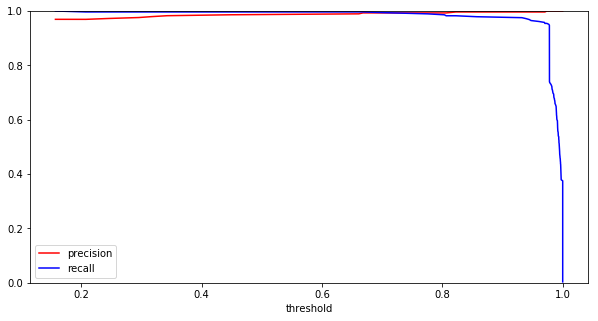

In [59]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-",label="precision")
    plt.plot(threshold, recall[:-1], "b", label="recall")
    plt.xlabel("threshold")
    plt.legend()
    plt.ylim([0, 1])
plt.figure(figsize=(10, 5))
plot_precision_and_recall(precision, recall, threshold)
    #plt.show()

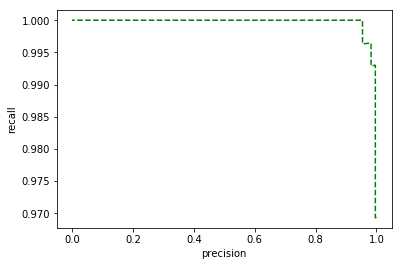

<Figure size 1008x504 with 0 Axes>

In [60]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--")
    plt.ylabel("recall")
    plt.xlabel("precision")
    plt.figure(figsize=(14, 7))
    
plot_precision_vs_recall(precision, recall)
plt.show()

In [61]:
evaluate(svc_rbf)

confusion matrix
 [[166   4]
 [  1 284]]

precision:  0.9861111111111112
recall:  0.9964912280701754
f1_score:  0.9912739965095986
roc_score:  0.9864809081527347


In [ ]:
#i was thinking to change the probability to some other value to improve my results but looks like at this moment it is enough good

In [ ]:
#still trying with different prob to get good results 

In [98]:
a=0.7
confusion_matrix(y_train,svc_rbf.predict_proba(X_train)[:,1]>a)

array([[168,   2],
       [  2, 283]], dtype=int64)

In [99]:
precision_score(y_train,(svc_rbf.predict_proba(X_train)[:,1]>a))

0.9929824561403509

In [100]:
recall_score(y_train,svc_rbf.predict_proba(X_train)[:,1]>a)

0.9929824561403509

In [101]:
f1_score(y_train,svc_rbf.predict_proba(X_train)[:,1]>a)

0.9929824561403509

In [102]:
roc_auc_score(y_train,svc_rbf.predict_proba(X_train)[:,1]>a)

0.990608875128999

In [ ]:
#indeed the results improved now lets finalize the model and check its working on the test set.

In [103]:
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(svc_rbf, 'filename1.pkl') 

# Load the model from the file 
clf_from_joblib = joblib.load('filename1.pkl') 

# Use the loaded model to make predictions 
"""clf_from_joblib.predict(test_x) 
"""
clf_from_joblib = joblib.load('filename1.pkl')
#pred = clf_from_joblib.predict(X_test)


In [117]:
pred = (clf_from_joblib.predict_proba(X_test)>a)[:,1]

In [118]:
confusion_matrix(y_test,pred)

array([[40,  2],
       [ 8, 64]], dtype=int64)

In [119]:
precision_score(y_test,pred)

0.9696969696969697

In [120]:
recall_score(y_test,pred)

0.8888888888888888

In [121]:
f1_score(y_test,pred)

0.927536231884058

In [122]:
roc_auc_score(y_test,pred)

0.9206349206349206

In [ ]:
df_new = pd.merge(dataset1,dataset,on='Country')[['Country','2015','Value']]

In [ ]:
dataset = dataset.loc[dataset['INEQUALITY']=='TOT']

In [ ]:
dataset = pd.pivot_table(dataset,index='Country',columns='Indicator',values="Value")

In [ ]:
dataset1 = dataset1.set_index('Country')

In [ ]:
df_new = pd.merge(dataset1,dataset,left_index=True,right_index=True)

In [ ]:
df_new = df_new.loc[:,['2015','Life satisfaction']].sort_values('2015')

In [ ]:
df_new = df_new.drop(df_new.iloc[[0, 1, 6, 8, 33, 34, 35]].index)

In [ ]:
df_new

In [ ]:
df_new.plot(kind='scatter',y='Life satisfaction',x='2015')

In [ ]:
X = df_new.iloc[:,0:1].values
y = df_new.iloc[:,1].values

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

In [ ]:
model.predict(22587)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X,y)

In [ ]:
model.predict(22587)

In [ ]:
df_new.plot(kind='scatter',y='Life satisfaction',x='2015')
plt.plot(X,model.predict(X),c='r')

# new data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
housing = pd.read_csv('C:\\Users\\Mridul\\New folder\\handson-ml-master\\datasets\\housing\\housing.csv')

In [3]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [5]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [6]:
housing = strat_train_set.copy()

In [7]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [9]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [10]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [11]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [12]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [90]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [91]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [92]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [16]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [17]:
X = imputer.transform(housing_num)

In [18]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))

In [19]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [20]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [28]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [75]:
housing_cat.shape

(16512, 1)

In [29]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [76]:
housing_cat_encoded.shape

(16512, 1)

In [30]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [31]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [32]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [99]:
housing_extra_attribs[:5].shape

(5, 11)

In [84]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [85]:
housing_extra_attribs.shape

(16512, 11)

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [119]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [120]:
housing_num_tr[:5]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314],
       [ 0.49247384, -0.65929936, -0.92673619,  1.85619316,  2.41221109,
         2.72415407,  2.57097492, -0.44143679, -0.35783383, -0.00419445,
         0.2699277 ]])

In [89]:
housing_num_tr.shape

(16512, 11)

In [38]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [39]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [83]:
housing_prepared[:5]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [40]:
housing_prepared.shape

(16512, 16)

In [41]:
housing_prepared.shape

(16512, 16)

In [42]:
housing_labels.shape

(16512,)

In [145]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210656. 317792. 211328.  59168. 189824.]


In [148]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [45]:

print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [46]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [47]:
some_data_prepared.shape

(5, 16)

In [48]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68629.3260519741

In [49]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49436.263141957366

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70232.0136482  66828.46839892 72444.08721003 70761.50186201
 71125.52697653 75581.29319857 70169.59286164 70055.37863456
 75370.49116773 71222.39081244]
Mean: 71379.07447706361
Standard deviation: 2458.3188204349362


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66757.24872434 66955.549825   70347.95244419 74753.19435503
 68028.34987393 71193.84183426 64988.67337893 68272.67633576
 71551.23476165 67665.7126089 ]
Mean: 69051.44341419876
Standard deviation: 2734.3257892610814


In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

c:\users\mridul\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [56]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21941.911027380233

In [57]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51650.94405471 48920.80645498 52979.16096752 54412.74042021
 50861.29381163 56488.55699727 51866.90120786 49752.24599537
 55399.50713191 53309.74548294]
Mean: 52564.19025244012
Standard deviation: 2301.873803919754


In [58]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69051.443414
std       2882.232453
min      64988.673379
25%      67133.090521
50%      68150.513105
75%      70982.369487
max      74753.194355
dtype: float64

In [59]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [61]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [62]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [63]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63647.85444595992 {'max_features': 2, 'n_estimators': 3}
55611.50159876327 {'max_features': 2, 'n_estimators': 10}
53370.06407363344 {'max_features': 2, 'n_estimators': 30}
60959.138858487866 {'max_features': 4, 'n_estimators': 3}
52740.58416665252 {'max_features': 4, 'n_estimators': 10}
50374.14214614731 {'max_features': 4, 'n_estimators': 30}
58661.2866461823 {'max_features': 6, 'n_estimators': 3}
52009.973979776936 {'max_features': 6, 'n_estimators': 10}
50154.11777368494 {'max_features': 6, 'n_estimators': 30}
57865.36168014446 {'max_features': 8, 'n_estimators': 3}
51730.07550866553 {'max_features': 8, 'n_estimators': 10}
49694.85143334442 {'max_features': 8, 'n_estimators': 30}
62874.407393096284 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54643.49980834466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59437.89228588419 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52735.358293621044 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [64]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.171542,0.012246,0.006598,0.000789,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.850668e+09,-4.134078e+09,...,-4.051049e+09,1.431223e+08,18,-1.065637e+09,-1.104930e+09,-1.116843e+09,-1.112813e+09,-1.129842e+09,-1.106013e+09,2.173798e+07
1,0.580631,0.051654,0.016801,0.001679,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.052380e+09,-3.250767e+09,...,-3.092639e+09,1.306954e+08,11,-5.932728e+08,-5.871800e+08,-5.780873e+08,-5.713421e+08,-5.797944e+08,-5.819353e+08,7.584886e+06
2,1.698761,0.082946,0.048812,0.004687,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.692176e+09,-3.017478e+09,...,-2.848364e+09,1.604534e+08,9,-4.385337e+08,-4.394786e+08,-4.374429e+08,-4.374715e+08,-4.451903e+08,-4.396234e+08,2.883885e+06
3,0.278943,0.048343,0.007394,0.001505,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.729600e+09,-3.794768e+09,...,-3.716017e+09,1.690029e+08,16,-9.869264e+08,-1.013680e+09,-9.172986e+08,-1.035901e+09,-9.711998e+08,-9.850011e+08,4.047487e+07
4,0.884966,0.117894,0.018799,0.002538,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.667093e+09,-2.786244e+09,...,-2.781569e+09,1.278498e+08,8,-5.100563e+08,-5.158568e+08,-4.960301e+08,-5.422542e+08,-5.158794e+08,-5.160154e+08,1.498960e+07
5,2.674422,0.284170,0.065313,0.022659,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387199e+09,-2.589622e+09,...,-2.537554e+09,1.209935e+08,3,-3.840273e+08,-3.880349e+08,-3.789712e+08,-4.036920e+08,-3.846171e+08,-3.878685e+08,8.424973e+06
6,0.393742,0.081073,0.007198,0.001161,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119576e+09,-3.589855e+09,...,-3.441147e+09,1.884229e+08,14,-9.250640e+08,-8.901810e+08,-9.360639e+08,-9.025026e+08,-8.612945e+08,-9.030212e+08,2.639683e+07
7,1.196339,0.121519,0.019315,0.005955,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.553481e+09,-2.782991e+09,...,-2.705037e+09,1.464963e+08,6,-4.977158e+08,-5.044224e+08,-4.996537e+08,-4.989516e+08,-5.063617e+08,-5.014210e+08,3.357661e+06
8,3.808434,0.180992,0.052807,0.005732,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.371924e+09,-2.583696e+09,...,-2.515436e+09,1.283580e+08,2,-3.833222e+08,-3.801143e+08,-3.805596e+08,-3.856159e+08,-3.904866e+08,-3.840197e+08,3.796810e+06
9,0.509496,0.102968,0.006595,0.001745,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.351347e+09,-3.352606e+09,...,-3.348400e+09,1.226683e+08,13,-9.225948e+08,-8.561612e+08,-8.596460e+08,-8.893698e+08,-9.146734e+08,-8.884890e+08,2.730057e+07


In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0D0C0730>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0D0C0750>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [66]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49147.15241724505 {'max_features': 7, 'n_estimators': 180}
51396.876896929905 {'max_features': 5, 'n_estimators': 15}
50797.05737322649 {'max_features': 3, 'n_estimators': 72}
50840.744513982805 {'max_features': 5, 'n_estimators': 21}
49276.17530332962 {'max_features': 7, 'n_estimators': 122}
50775.46331678437 {'max_features': 3, 'n_estimators': 75}
50681.383924974936 {'max_features': 3, 'n_estimators': 88}
49612.152530468346 {'max_features': 5, 'n_estimators': 100}
50473.01751424941 {'max_features': 3, 'n_estimators': 150}
64458.25385034794 {'max_features': 5, 'n_estimators': 2}


In [67]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [121]:
feature_importances.shape

(16,)

In [68]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3661589806181342, 'median_income'),
 (0.1647809935615905, 'INLAND'),
 (0.10879295677551573, 'pop_per_hhold'),
 (0.07334423551601242, 'longitude'),
 (0.0629090704826203, 'latitude'),
 (0.05641917918195401, 'rooms_per_hhold'),
 (0.05335107734767581, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402767, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407807, 'households'),
 (0.014106483453584102, 'total_bedrooms'),
 (0.010311488326303787, '<1H OCEAN'),
 (0.0028564746373201575, 'NEAR OCEAN'),
 (0.00196041559947807, 'NEAR BAY'),
 (6.028038672736599e-05, 'ISLAND')]

In [69]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [70]:
final_rmse

47766.00396643308

In [71]:
from scipy import stats

In [72]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45720.21311746, 49727.70236334])

In [73]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45720.21311746037, 49727.70236333674)

In [74]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45720.8265224029, 49727.13838489947)

In [134]:
a = pd.DataFrame(np.arange(1,5).reshape(2,2))

In [144]:
a

,0,1
0,1,2
1,999,5


In [137]:
a.iloc[1,1]=5

In [140]:
b = a.iloc[1,:]

In [142]:
b[0] = 999

In [143]:
b

0    999
1      5
Name: 1, dtype: int32

In [ ]:
dataset['cool'] = np.ceil(dataset['median_income']/1.5)
dataset['cool'].where(dataset['cool']<5,5.0,inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(dataset,dataset['cool']):
    strat_train = dataset.loc[train_index] 
    strat_test  = dataset.loc[train_index]
for i in (strat_train,strat_test):
    i.drop('cool',axis=1,inplace=True)

In [ ]:
dataset = strat_train.copy()

In [ ]:
#dataset.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,s=dataset['population']/100,label='population',
#            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,figsize=(15,12),sharex=False)
#plt.legend()

In [ ]:
#pd.plotting.scatter_matrix(dataset[['longitude', 'latitude','median_income','median_house_value']],figsize=(15,12));

In [ ]:
housing = strat_train.drop('median_house_value',axis=1)
housing_labels = strat_train['median_house_value'].copy()

In [ ]:
housing.head()

In [ ]:
housing[housing.isnull().any(axis=1)].head()

In [ ]:
from sklearn.preprocessing import Imputer,OneHotEncoder,LabelEncoder,StandardScaler
impute = Imputer(strategy='median',axis=0)
housing_u = housing.drop('ocean_proximity',axis=1)
X = impute.fit_transform(housing_u)

In [ ]:
housing_t = pd.DataFrame(X,columns=housing_u.columns,index=housing_u.index)

In [ ]:
labele = LabelEncoder()
#chater = housing['ocean_proximity']
encoded = labele.fit_transform(housing['ocean_proximity'])

In [ ]:
onehot = OneHotEncoder()
onehoted = onehot.fit_transform(encoded.reshape(-1,1)).toarray()

In [ ]:
onehoted

In [ ]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['population_per_household'] = housing['population']/housing['households']

In [ ]:
scale_p = StandardScaler()
